<a href="https://colab.research.google.com/github/codingCapricorn/K-Means-Algorithm/blob/master/5_K_Means%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "K-Means++ Clustering Algorithm" ::::



###An Advancement Over K-Means Clustering Technique

###Disadvantage of the K-means algorithm ::::

1. It is sensitive to the initialization of the centroids or the mean points. So, if a centroid is initialized to be a “far-off” point, it might just end up with no points associated with it, and at the same time, more than one cluster might end up linked with a single centroid.

2. Similarly, more than one centroids might be initialized into the same cluster resulting in poor clustering.

##Steps involved in implementing K-Means++ Algorithm ::::

1. Randomly select the first centroid from the data points.

2. For each data point compute its distance from the nearest, previously chosen centroid.

3. Select the next centroid from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid. (i.e. the point having maximum distance from the nearest centroid is most likely to be selected next as a centroid)

4. Repeat steps 2 and 3 untill k centroids have been sampled

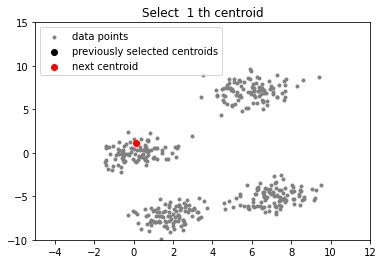

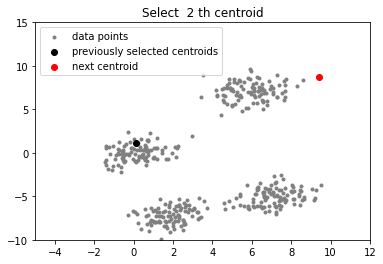

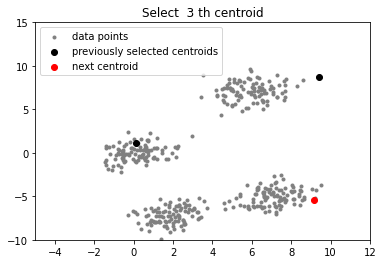

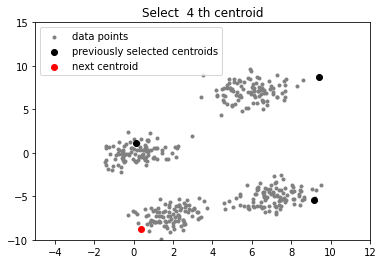

In [2]:
# importing dependencies 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sys 

# creating data 
mean_01 = np.array([0.0, 0.0]) 
cov_01 = np.array([[1, 0.3], [0.3, 1]]) 
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100) 

mean_02 = np.array([6.0, 7.0]) 
cov_02 = np.array([[1.5, 0.3], [0.3, 1]]) 
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100) 

mean_03 = np.array([7.0, -5.0]) 
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]]) 
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100) 

mean_04 = np.array([2.0, -7.0]) 
cov_04 = np.array([[1.2, 0.5], [0.5, 1,3]]) 
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100) 

data = np.vstack((dist_01, dist_02, dist_03, dist_04)) 
np.random.shuffle(data) 

# function to plot the selected centroids 
def plot(data, centroids): 
	plt.scatter(data[:, 0], data[:, 1], marker = '.', 
				color = 'gray', label = 'data points') 
	plt.scatter(centroids[:-1, 0], centroids[:-1, 1], 
				color = 'black', label = 'previously selected centroids') 
	plt.scatter(centroids[-1, 0], centroids[-1, 1], 
				color = 'red', label = 'next centroid') 
	plt.title('Select % d th centroid'%(centroids.shape[0])) 
	
	plt.legend() 
	plt.xlim(-5, 12) 
	plt.ylim(-10, 15) 
	plt.show() 
		
# function to compute euclidean distance 
def distance(p1, p2): 
	return np.sum((p1 - p2)**2) 

# initialization algorithm 
def initialize(data, k): 
	''' 
	initialized the centroids for K-means++ 
	inputs: 
		data - numpy array of data points having shape (200, 2) 
		k - number of clusters 
	'''
	## initialize the centroids list and add 
	## a randomly selected data point to the list 
	centroids = [] 
	centroids.append(data[np.random.randint( 
			data.shape[0]), :]) 
	plot(data, np.array(centroids)) 

	## compute remaining k - 1 centroids 
	for c_id in range(k - 1): 
		
		## initialize a list to store distances of data 
		## points from nearest centroid 
		dist = [] 
		for i in range(data.shape[0]): 
			point = data[i, :] 
			d = sys.maxsize 
			
			## compute distance of 'point' from each of the previously 
			## selected centroid and store the minimum distance 
			for j in range(len(centroids)): 
				temp_dist = distance(point, centroids[j]) 
				d = min(d, temp_dist) 
			dist.append(d) 
			
		## select data point with maximum distance as our next centroid 
		dist = np.array(dist) 
		next_centroid = data[np.argmax(dist), :] 
		centroids.append(next_centroid) 
		dist = [] 
		plot(data, np.array(centroids)) 
	return centroids 

# call the initialize function to get the centroids 
centroids = initialize(data, k = 4) 


###Although the initialization in K-means++ is computationally more expensive than the standard K-means algorithm, the run-time for convergence to optimum is drastically reduced for K-means++. This is because the centroids that are initially chosen are likely to lie in different clusters already.

